In [3]:
%pylab notebook
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import *
import numpy as np
from math import *
import time
import pandas as pd
from datetime import datetime
import csv
from scipy import integrate
import itertools
from scipy.special import jv
import csv
import numpy as np
import pylab as plt

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Miniconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['datetime', 'isinf', 'fabs', 'fmod', 'hypot', 'isnan', 'axes', 'contour', 'expm1', 'modf', 'rc', 'rcdefaults', 'legend', 'frexp', 'table', 'degrees', 'set_loglevel', 'e', 'exp', 'tan', 'inf', 'isclose', 'ldexp', 'rc_context', 'nan', 'log', 'log1p', 'colorbar', 'cycler', 'pi', 'log10', 'sinh', 'text', 'cos', 'sin', 'isfinite', 'gcd', 'tri', 'floor', 'stackplot', 'gamma', 'ceil', 'streamplot', 'plt', 'trunc', 'test', 'copysign', 'radians', 'axis', 'tanh', 'figure', 'sqrt', 'quiver', 'remainder', 'tight_layout', 'cosh', 'log2']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [ ]:
#calculate the appropriate V_pi
from scipy.optimize import curve_fit

def appfunc(V, vpi):
    return jv(0,V*pi/vpi)**2

def appfuncside1(V, vpi):
    return jv(1,V*pi/vpi)**2

def appfunc2(f, a, b):
    return a*f+b

def optvpi(xdata, ydata):
    popt, pcov = curve_fit(appfunc, xdata, ydata)
    return [popt,pcov]

def optvpiside1(xdata, ydata):
    popt, pcov = curve_fit(appfuncside1, xdata, ydata)
    return [popt,pcov]

def optvpitrend(xdata, ydata):
    popt, pcov = curve_fit(appfunc2, xdata, ydata)
    return [popt,pcov]

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  


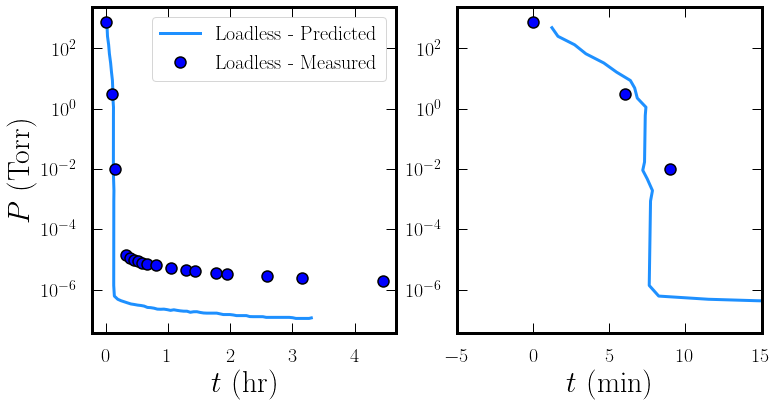

In [29]:
#set global plotting parameters
linew = 5.0 #line width
#msize = 14 #marker size
axew = 1.0 #axes width

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

#set the distance to offset the numbers from the ticks
numpad = 15

vpis = []

#set global tick parameters
majw = axew #major tick width
majl = 10.0 #major tick length
minw = axew #minor tick width
minl = 5.0 #minor tick length

#set global font sizes
axefont = 20 #axis label font size
numsize = 20 #axis number font size
legfont = 20 #legend font size
labelfont=30

#format axis labels
#x_locator = FixedLocator([0,.5,1.0])
#x_formatter = FixedFormatter([0,.5,1.0])
#y_locator = FixedLocator([0,.5,1.00])
#y_formatter = FixedFormatter([0,.5,1.00])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
plt.subplots_adjust(hspace=0.0)
fig.set_facecolor('w')
fig.subplots_adjust(hspace=0.2, wspace=0.2)

axes[0].set_ylabel(r'$P$ (Torr)', fontsize = labelfont)
axes[0].set_xlabel(r'$t$ (hr)', fontsize = labelfont)
axes[1].set_xlabel(r'$t$ (min)', fontsize = labelfont)

for i in range(0,len(axes)):
    axes[i].tick_params(axis='x',which='major',width=majw,length=majl,labelsize=numsize,zorder=1,direction='in',pad=numpad,top='off')
    axes[i].tick_params(axis='x',which='minor',width=minw,length=minl,labelsize=numsize,zorder=1,direction='in',pad=numpad,top='off')
    axes[i].tick_params(axis='y',which='major',width=majw,length=majl,labelsize=numsize,zorder=1,direction='in',pad=numpad,right='off')
    axes[i].tick_params(axis='y',which='minor',width=minw,length=minl,labelsize=numsize,zorder=1,direction='in',pad=numpad,right='off')


for axis in ['top','bottom','left','right']:
    axes[0].spines[axis].set_linewidth(3)
    axes[1].spines[axis].set_linewidth(3)

def importCSV(fname, rowno):
    data = []
    with open(fname, newline='') as csvfile:
        csvReader = csv.reader(csvfile)
        for row in csvReader:
            data.append(float(row[rowno]))
    return data

vacuum_pred_x = np.array(importCSV('Vacuum_Prediction.csv',0))
vacuum_pred_y = np.array(importCSV('Vacuum_Prediction.csv',1))

meas_x = [0, 6, 9, 19, 23, 27, 31, 35, 40, 48, 63, 77, 86, 106, 117, 156, 189, 267]
meas_y = [760, 3, 1e-2, 1.4e-5, 1.1e-5,9.8e-6, 8.7e-6, 7.8e-6, 7.2e-6, 6.4e-6, 5.1e-6, 4.6e-6, 4.2e-6, 3.6e-6, 3.3e-6, 2.8e-6, 2.5e-6, 2e-6]


axes[0].plot(vacuum_pred_x, vacuum_pred_y ,linewidth = 3, color ='dodgerblue',label='Loadless - Predicted')
axes[0].plot(np.array(meas_x)/60, meas_y ,'.',color='blue',markeredgewidth=1.5, markeredgecolor='k',markersize=22,zorder=3,label='Loadless - Measured')


axes[1].plot(vacuum_pred_x*60, vacuum_pred_y ,linewidth = 3, color ='dodgerblue',label='Loadless Predicted')
axes[1].plot(np.array(meas_x), meas_y,'.',color='blue',markeredgewidth=1.5, markeredgecolor='k',markersize=22,zorder=3,label='Pred')
axes[1].set_xlim(-5,15)
axes[0].set_yscale('log')
axes[1].set_yscale('log')
axes[0].legend(fontsize = legfont)




In [15]:
[1/60]*len(meas_x)

[0.016666666666666666,
 0.016666666666666666,
 0.016666666666666666,
 0.016666666666666666,
 0.016666666666666666,
 0.016666666666666666,
 0.016666666666666666,
 0.016666666666666666,
 0.016666666666666666,
 0.016666666666666666,
 0.016666666666666666,
 0.016666666666666666,
 0.016666666666666666,
 0.016666666666666666,
 0.016666666666666666,
 0.016666666666666666,
 0.016666666666666666,
 0.016666666666666666]